In [15]:
import pandas as pd
import glob
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab as pl
%matplotlib inline

# Check data distribution

In [3]:
dfs = []
for file in glob.glob('./new_data/*.csv'):
    df1 = pd.read_csv(file)
    dfs.append(df1)
df = pd.concat(dfs)
print(df.shape)
print(df.columns)

(10344, 8)
Index(['HITId', 'Input.characters', 'Input.texts', 'Answer.agreeable',
       'Answer.conscientious', 'Answer.extraverted', 'Answer.open',
       'Answer.stable'],
      dtype='object')


In [18]:
ids = set(df.HITId.values)
print(len(ids))
fiveCols = ['Answer.agreeable','Answer.conscientious','Answer.extraverted','Answer.open','Answer.stable']
fiveCSVs = {trait: [] for trait in fiveCols} 
for id in ids:
    df2 = df.loc[(df['HITId'] == id)]
#     df2 = df2.replace(-1,2)
#     print df2
#     break
    df2_list = df2[fiveCols].values.T.tolist() # the order is the same as fiveCols
#     print(df2[fiveCols])
#     print(df2_list)
#     break
    for idx, batchAnnon in enumerate(df2_list):
        fiveCSVs[fiveCols[idx]].append(batchAnnon)

3448


In [14]:
sum_lists = []
for trait in fiveCols:
    trait_list = fiveCSVs[trait]
    trait_sum_list = [sum(l) for l in trait_list]
    sum_lists.append(trait_sum_list)

Counter({1.0: 871, 2.0: 823, 0.0: 643, 3.0: 506, -1.0: 398, -2.0: 160, -3.0: 47})


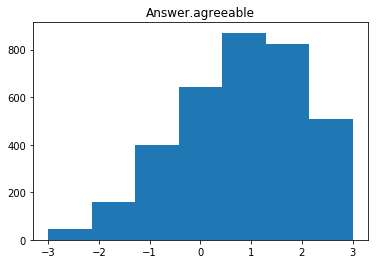

Counter({1.0: 1051, 0.0: 820, 2.0: 722, -1.0: 449, 3.0: 252, -2.0: 139, -3.0: 15})


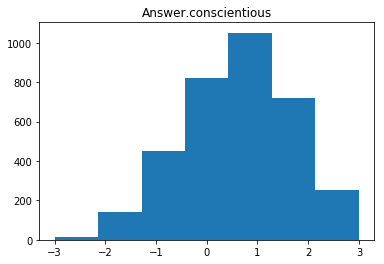

Counter({2.0: 1158, 1.0: 932, 3.0: 650, 0.0: 481, -1.0: 182, -2.0: 36, -3.0: 9})


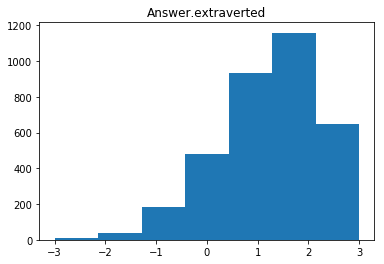

Counter({1.0: 957, 2.0: 814, 0.0: 790, 3.0: 386, -1.0: 359, -2.0: 119, -3.0: 23})


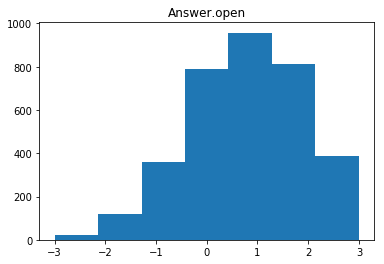

Counter({1.0: 1000, 0.0: 807, 2.0: 667, -1.0: 532, 3.0: 193, -2.0: 187, -3.0: 62})


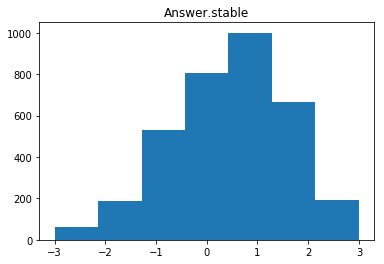

In [22]:
for idx, sum_list in enumerate(sum_lists):
    h = sorted(sum_list)
    print(Counter(h))
    plt.title(fiveCols[idx])
    plt.hist(h, bins=7, range=(-3,3))
    plt.show()

# Anotation 1: 
 - group 0: -3, -2, -1
 - group 1: 0, 1
 - group 2: 2, 3

In [45]:
final_dist = {k: 0 for k in [0,1,2]}
for idx, sum_list in enumerate(sum_lists):
    h = sorted(sum_list)
    c = Counter(h)
#     nc = {k: c[k]/3448 for k in c}
#     print(sum([nc[k] for k in nc])) # pass, sum is 1
    
    # merge -2, -3, -1
    final_dist[0] = c[-3]+c[-2]+c[-1]
    # merge 0, 1
    final_dist[1] = c[0]+c[1]
    # merge 2, 3
    final_dist[2] = c[3]+c[2]
    
    print(fiveCols[idx])
    print([final_dist[i] for i in [0,1,2]])
    print([round(final_dist[i]/3448.0, 2) for i in [0,1,2]])

Answer.agreeable
[605, 1514, 1329]
[0.18, 0.44, 0.39]
Answer.conscientious
[603, 1871, 974]
[0.17, 0.54, 0.28]
Answer.extraverted
[227, 1413, 1808]
[0.07, 0.41, 0.52]
Answer.open
[501, 1747, 1200]
[0.15, 0.51, 0.35]
Answer.stable
[781, 1807, 860]
[0.23, 0.52, 0.25]


# Anotation 2: 
 - group 0: -3, -2, -1, 0
 - group 1: 1
 - group 2: 2, 3

In [47]:
final_dist = {k: 0 for k in [0,1,2]}
for idx, sum_list in enumerate(sum_lists):
    h = sorted(sum_list)
    c = Counter(h)
#     nc = {k: c[k]/3448 for k in c}
#     print(sum([nc[k] for k in nc])) # pass, sum is 1
    
    # merge -2, -3, -1
    final_dist[0] = c[0]+c[-3]+c[-2]+c[-1]
    # merge 0, 1
    final_dist[1] = c[1]
    # merge 2, 3
    final_dist[2] = c[3]+c[2]
    
    print(fiveCols[idx])
    print([final_dist[i] for i in [0,1,2]])
    print([round(final_dist[i]/3448.0, 2) for i in [0,1,2]])

Answer.agreeable
[1248, 871, 1329]
[0.36, 0.25, 0.39]
Answer.conscientious
[1423, 1051, 974]
[0.41, 0.3, 0.28]
Answer.extraverted
[708, 932, 1808]
[0.21, 0.27, 0.52]
Answer.open
[1291, 957, 1200]
[0.37, 0.28, 0.35]
Answer.stable
[1588, 1000, 860]
[0.46, 0.29, 0.25]
